In [ ]:
#IMPORT LIBRARY
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#IMPORT DATA
from sklearn.datasets import load_digits


In [ ]:
df= load_digits()

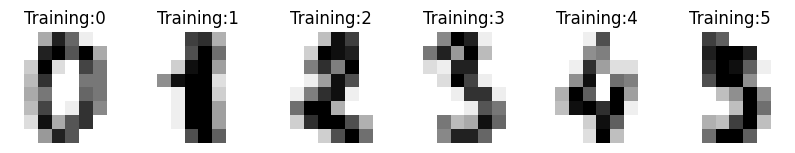

In [39]:
_,axes=plt.subplots(nrows=1,ncols=6,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training:%i"%label)
  

In [ ]:
#DATA PREPROCESSING
#Flatten Image
df.images.shape

(1797, 8, 8)

In [ ]:
df.images [0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images [0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

In [ ]:
#SCALING IMAGE DATA
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [ ]:
#TRAIN TEST SPLIT DATA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [ ]:
#RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#PREDICT TEST DATA
y_pred=rf.predict(X_test)

In [ ]:
y_pred


array([9, 9, 0, 4, 1, 9, 9, 1, 5, 2, 8, 2, 8, 6, 1, 1, 6, 7, 7, 0, 5, 6,
       4, 4, 4, 6, 4, 3, 4, 7, 8, 8, 4, 6, 2, 7, 6, 8, 2, 1, 2, 2, 8, 6,
       4, 7, 7, 3, 4, 9, 7, 3, 9, 1, 2, 9, 5, 2, 5, 7, 5, 8, 5, 7, 2, 0,
       2, 1, 6, 0, 9, 0, 4, 7, 8, 7, 3, 2, 4, 1, 4, 4, 7, 1, 9, 4, 2, 3,
       3, 6, 6, 9, 9, 8, 0, 7, 9, 9, 6, 4, 0, 4, 6, 5, 2, 6, 1, 5, 4, 7,
       1, 2, 3, 0, 0, 4, 6, 6, 8, 6, 1, 3, 6, 6, 0, 7, 9, 2, 5, 0, 5, 2,
       1, 5, 3, 5, 1, 6, 9, 8, 8, 0, 0, 3, 5, 2, 4, 4, 4, 8, 3, 9, 7, 5,
       4, 7, 7, 9, 2, 3, 2, 9, 8, 8, 2, 0, 9, 8, 2, 8, 0, 9, 1, 0, 4, 8,
       9, 4, 5, 2, 1, 7, 1, 5, 6, 2, 7, 8, 3, 2, 9, 5, 8, 2, 7, 8, 4, 3,
       5, 5, 5, 6, 3, 3, 2, 2, 0, 9, 1, 3, 0, 6, 8, 3, 4, 4, 3, 3, 8, 6,
       3, 2, 5, 6, 3, 0, 1, 1, 4, 4, 8, 5, 0, 5, 2, 0, 3, 2, 1, 5, 6, 8,
       7, 8, 0, 7, 6, 5, 4, 6, 5, 6, 8, 7, 7, 9, 0, 9, 0, 4, 7, 2, 1, 1,
       9, 0, 6, 0, 6, 3, 8, 6, 4, 2, 5, 4, 8, 5, 4, 5, 0, 8, 7, 7, 4, 9,
       3, 3, 5, 3, 6, 4, 4, 5, 1, 5, 0, 2, 8, 7, 0,

In [ ]:
#MODEL ACCURACY
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
confusion_matrix(y_test,y_pred)

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 63,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 48,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 51,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  1, 56]])

In [38]:
print(classification_report(y_test,y_pred))
                      

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      1.00      0.99        51
           2       1.00      1.00      1.00        54
           3       0.98      0.96      0.97        53
           4       0.98      1.00      0.99        63
           5       0.96      0.94      0.95        51
           6       0.98      1.00      0.99        49
           7       1.00      0.98      0.99        54
           8       0.93      0.98      0.95        52
           9       1.00      0.95      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

